In [1]:
# This cell allows you to train the net by exposing it to a bunch of different sequences generated by the system.
keras_history = History()
num_of_runs = 500
losses = []
differences = []
for i in range(num_of_runs):
    training_data = generate_training_data(100000)
    training_inputs = training_data[0]
    training_outputs = training_data[1]
    print(f'Training set {i + 1}/{num_runs} started')
    keras_history = system_model.fit(training_inputs,training_outputs,batch_size=100,epochs=3000,validation_split=0.2)
    loss = keras_history.history["val_loss"]
    losses.append(loss)
    difference = keras_history.history["val_true_difference"]
    differences.append(difference)
    print(f'Training set {i + 1}/{num_runs} completed')

NameError: name 'History' is not defined

In [1]:
import numpy as np
import random as rand
import tensorflow as tf
import pandas as pd
import keras
import matplotlib
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import SimpleRNN
from keras.layers import Add as keras_add_layers
from keras.callbacks import History
np.set_printoptions(suppress=True)
keras_history = History()

Using TensorFlow backend.


In [2]:
# Generates training data
def generate_training_data(data_amount=10000):
    max_value = 100000000
    scalar_value = 10
    inputs = []
    outputs = []
    prev_force = 0
    weight = 45
    for i in range(data_amount):
        nums = [scalar_value * rand.randint(-max_value,max_value) / max_value,prev_force]
        inputs.append(np.array(nums))
        prev_force += nums[0] / weight
        outputs.append(np.array([prev_force]))
    return [np.array(inputs),np.array(outputs)]

In [3]:
def get_progression(model,inputs):
    training_input = inputs[0]
    preds = [inputs[0][1]]
    for i in range(len(inputs)):
        #training_input = [training_input[0] if x == 0 else inputs[i][x - 1] for x in range()]
        training_input = [inputs[i][0],training_input[1]]
        #training_input = [training_input[0],inputs[i][1]]
        output = model.predict(np.array([training_input,training_input]))[0]
        #print(inputs[i])
        #print('----------')
        #print(training_input)
        #print()
        preds.append(output[0])
        training_input[1] = output[0]
        #training_input[0] = output[0]
        #print(f"{i + 1} / {len(inputs)}")
    return np.array(preds)

In [17]:
# Generates a data frame containing training relevant data
training_data = generate_training_data(100000)
training_inputs = training_data[0]
training_outputs = training_data[1]
df = pd.DataFrame(data=[[i,training_inputs[i][0],training_inputs[i][1],training_outputs[i][0]]
                        for i in range(len(training_inputs))],
                  columns=["Time","Displacement","Prev_Force","Force"])
#df

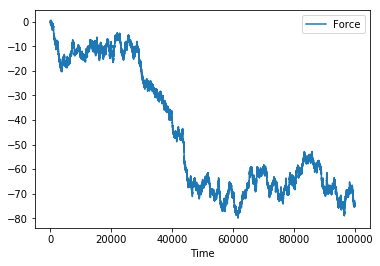

In [18]:
ax = df.plot(x='Time',y='Force')

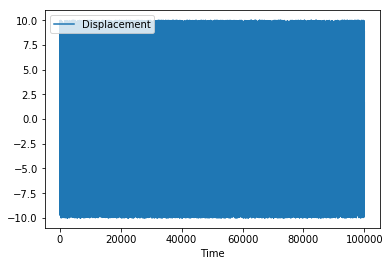

In [19]:
ax2 = df.plot(x='Time',y='Displacement')

In [20]:
# Create model
system_model = Sequential()
#system_model.add(SimpleRNN(2,activation="linear"))
system_model.add(Dense(2,activation="linear",input_dim=2))
#system_model.add(Dropout(0.12))
system_model.add(Dense(2,activation="sigmoid"))
#system_model.add(Dropout(0.12))
system_model.add(Dense(1,activation="linear"))
system_model.compile(optimizer="adam",loss="mean_absolute_percentage_error",metrics=['mae'])

In [21]:
keras_history = system_model.fit(training_inputs,training_outputs,batch_size=256,epochs=2000)

Epoch 1/2000
100000/100000 [==============================] - 1s 12us/step - loss: 98.0143 - mean_absolute_error: 45.0228
Epoch 2/2000
100000/100000 [==============================] - 0s 5us/step - loss: 95.5859 - mean_absolute_error: 44.3394
Epoch 3/2000
100000/100000 [==============================] - 0s 4us/step - loss: 93.3419 - mean_absolute_error: 43.6883
Epoch 4/2000
100000/100000 [==============================] - 0s 5us/step - loss: 90.8741 - mean_absolute_error: 43.0161
Epoch 5/2000
100000/100000 [==============================] - 0s 4us/step - loss: 88.0379 - mean_absolute_error: 42.3153
Epoch 6/2000
100000/100000 [==============================] - 0s 4us/step - loss: 84.9008 - mean_absolute_error: 41.5487
Epoch 7/2000
100000/100000 [==============================] - 0s 5us/step - loss: 81.5961 - mean_absolute_error: 40.7348
Epoch 8/2000
100000/100000 [==============================] - 0s 4us/step - loss: 78.3476 - mean_absolute_error: 39.9027
Epoch 9/2000
 87552/100000 [===

KeyboardInterrupt: 

In [42]:
loss = keras_history.history['loss']
val_loss = keras_history.history['val_loss']
history_df = pd.DataFrame(data=[[i,loss[i],val_loss[i]] for i in range(len(keras_history.history["loss"]))],
                         columns=["Time","Loss","Val_Loss"])
#history_df

KeyError: 'val_loss'

In [ ]:
ax = history_df.plot(x='Time',y=['Loss','Val_Loss'])

In [25]:
preds_1 = system_model.predict(training_inputs)
#preds_2 = get_progression(system_model,training_inputs)
#df2 = pd.DataFrame(data=[[i,preds_1[i][0],preds_2[i],training_outputs[i][0],
#                          np.abs(preds_1[i][0] - training_outputs[i][0]) / ((preds_1[i][0] + training_outputs[i][0]) / 2),
#                          np.abs(preds_2[i] - training_outputs[i][0]) / ((preds_2[i] + training_outputs[i][0]) / 2)] 
#                          for i in range(len(training_outputs))],
#                          columns=['Time','Predictions_1','Predictions_2','Real','Difference','Difference_2'])


df2 = pd.DataFrame(data=[[i,preds_1[i][0],training_outputs[i][0],
                          np.abs(preds_1[i][0] - training_outputs[i][0]) / ((preds_1[i][0] + training_outputs[i][0]) / 2)] 
                          for i in range(len(training_outputs))],
                          columns=['Time','Predictions_1','Real','Difference'])

#df2

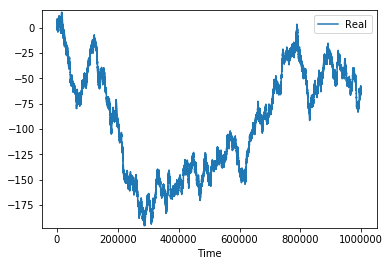

In [26]:
ax = df2.plot(x='Time',y='Real',ylim=(min(training_outputs) - 2,max(training_outputs) + 2))

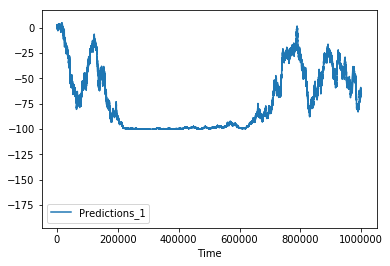

In [27]:
ax = df2.plot(x='Time',y='Predictions_1',ylim=(min(training_outputs) - 2,max(training_outputs) + 2))

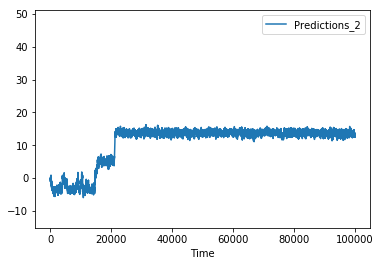

In [53]:
ax = df2.plot(x='Time',y='Predictions_2',ylim=(min(training_outputs) - 2,max(training_outputs) + 2))

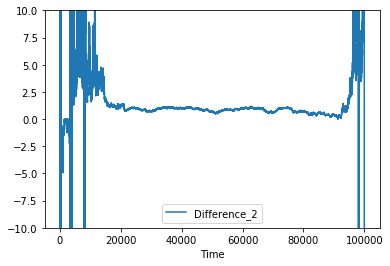

In [54]:
ax = df2.plot(x='Time',y='Difference_2',ylim=(-10,10))

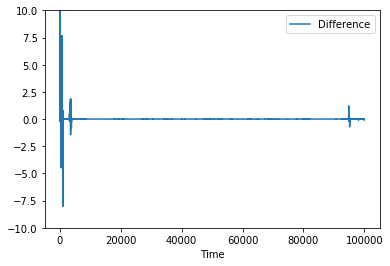

In [55]:
ax = df2.plot(x='Time',y='Difference',ylim=(-10,10))

In [21]:
new_training_data = generate_training_data()
new_training_inputs = new_training_data[0]
new_training_outputs = new_training_data[1]
new_preds_1 = system_model.predict(new_training_inputs)
new_preds_2 = get_progression(system_model,new_training_inputs)
df3 = pd.DataFrame(data=[[i,new_preds_1[i][0],new_preds_2[i],new_training_outputs[i][0],
                          np.abs(new_preds_1[i][0] - new_training_outputs[i][0]) / ((new_preds_1[i][0] + new_training_outputs[i][0]) / 2),
                          np.abs(new_preds_2[i] - new_training_outputs[i][0]) / ((new_preds_2[i] + new_training_outputs[i][0]) / 2)] 
                          for i in range(len(new_training_outputs))],
                          columns=['Time','Predictions_1','Predictions_2','Real','Difference_1','Difference_2'])
#df3

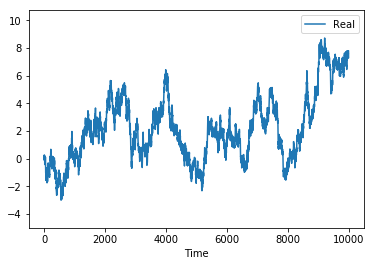

In [22]:
ax = df3.plot(x='Time',y='Real',ylim=(min(new_training_outputs) - 2,max(new_training_outputs) + 2))

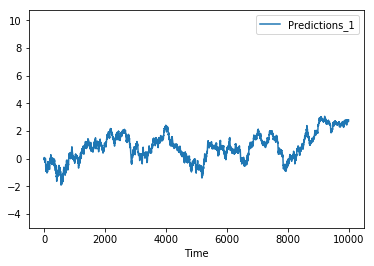

In [23]:
ax = df3.plot(x='Time',y='Predictions_1',ylim=(min(new_training_outputs) - 2,max(new_training_outputs) + 2))

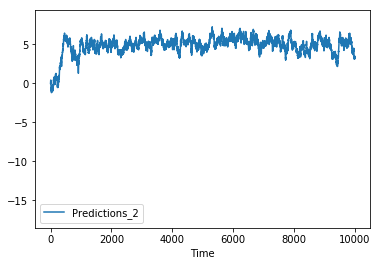

In [66]:
#ax = df3.plot(x='Time',y='Predictions_2',c='Difference_2',colormap='viridis',ylim=(min(new_training_outputs) - 2,max(new_training_outputs) + 2))
ax = df3.plot(x='Time',y='Predictions_2',ylim=(min(new_training_outputs) - 2,max(new_training_outputs) + 2))

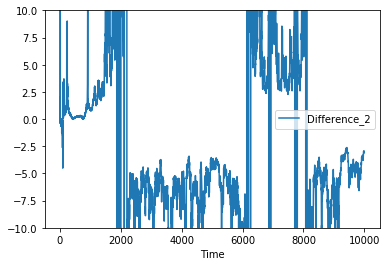

In [67]:
ax = df3.plot(x='Time',y='Difference_2',ylim=(-10,10))

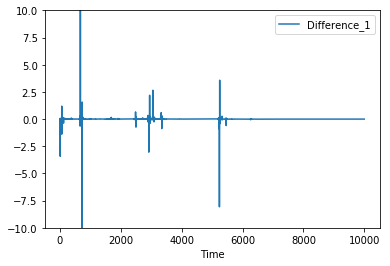

In [61]:
ax = df3.plot(x='Time',y='Difference_1',ylim=(-10,10))